In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'inventory.csv',
 'states0.csv',
 'states1.csv',
 'states2.csv',
 'states3.csv',
 'states4.csv',
 'states5.csv',
 'states6.csv',
 'states7.csv',
 'states8.csv',
 'states9.csv',
 'Untitled.ipynb']

In [3]:
listOfStates = os.listdir()[4:-1]
cols = ['State', 'TotalPop', 'Hispanic', 'White', 'Black','Native', 'Asian', 'Pacific', 'Income', 'GenderPop']

In [4]:
states = pd.concat([pd.read_csv(f, usecols = cols ) for f in listOfStates])

In [5]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 5
Data columns (total 10 columns):
State        48 non-null object
TotalPop     48 non-null int64
Hispanic     48 non-null object
White        48 non-null object
Black        48 non-null object
Native       48 non-null object
Asian        48 non-null object
Pacific      46 non-null object
Income       48 non-null object
GenderPop    48 non-null object
dtypes: int64(1), object(9)
memory usage: 4.1+ KB


In [6]:
states.head(10)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,$50811.08205128205,4883331M_5123362F
1,Hawaii,1406299,9.186708860759486%,25.032278481012657%,2.052848101265823%,0.1449367088607596%,36.59208860759495%,8.758860759493672%,$73264.42628205128,709871M_696428F
2,Idaho,1616547,11.505369127516781%,83.1362416107383%,0.5667785234899323%,1.468120805369128%,1.135906040268457%,0.1271812080536914%,$48017.31543624161,810464M_806083F
3,Illinois,12873761,15.601733547351516%,60.85980738362764%,17.108410914927717%,0.11842696629213499%,4.475377207062604%,0.02003210272873195%,$59587.04887459807,6316899M_6556862F
4,Indiana,6568645,6.536744186046501%,78.43189368770771%,11.18697674418606%,0.1940863787375415%,1.5782724252491687%,0.03262458471760798%,$48616.22784810127,3235263M_3333382F
5,Iowa,3093526,5.30364520048603%,87.71968408262464%,3.2569866342648868%,0.2897934386391251%,1.699392466585662%,0.055164034021871235%,$53017.75304136253,1534595M_1558931F
0,Iowa,3093526,5.30364520048603%,87.71968408262464%,3.2569866342648868%,0.2897934386391251%,1.699392466585662%,0.055164034021871235%,$53017.75304136253,1534595M_1558931F
1,Kansas,2892987,11.644342105263148%,75.95828947368425%,6.5678947368421%,0.7339473684210529%,2.331052631578946%,NaN,$53885.612648221344,1439862M_1453125F
2,Kentucky,4397353,3.222993688007212%,85.2307484220019%,8.272317403065832%,0.1666366095581602%,1.1298467087466182%,0.046438232642019836%,$45285.80253623189,2164208M_2233145F
3,Louisiana,4625253,4.866489361702128%,54.978546099290796%,36.32624113475175%,0.48430851063829816%,1.669060283687941%,0.039184397163120555%,$44957.99376114082,2261156M_2364097F


In [7]:
states['Pacific'] = states['Pacific'].fillna('%')

In [8]:
states['Hispanic'] = states['Hispanic'].apply(lambda x: x.rstrip('%'))
states['White'] = states['White'].apply(lambda x: x.rstrip('%'))
states['Black'] = states['Black'].apply(lambda x: x.rstrip('%'))
states['Native'] = states['Native'].apply(lambda x: x.rstrip('%'))
states['Asian'] = states['Asian'].apply(lambda x: x.rstrip('%'))
states['Pacific'] = states['Pacific'].apply(lambda x: x.rstrip('%'))
states['Income'] = states['Income'].apply(lambda x: x.lstrip('$'))
states['MalePop'] = states['GenderPop'].apply(lambda x: x.split('_')[0].rstrip('M'))
states['FemalePop'] = states['GenderPop'].apply(lambda x: x.split('_')[1].rstrip('F'))

states.replace(r'^\s*$', np.nan, regex=True,inplace=True)

In [9]:
states.head(10)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,Georgia,10006693,8.418242207460397,54.28630556974962,32.08829841594277,0.18758303525804798,3.0976494634644895,0.046601941747572824,50811.08205128205,4883331M_5123362F,4883331,5123362
1,Hawaii,1406299,9.186708860759486,25.032278481012657,2.052848101265823,0.1449367088607596,36.59208860759495,8.758860759493672,73264.42628205128,709871M_696428F,709871,696428
2,Idaho,1616547,11.505369127516781,83.1362416107383,0.5667785234899323,1.468120805369128,1.135906040268457,0.1271812080536914,48017.31543624161,810464M_806083F,810464,806083
3,Illinois,12873761,15.601733547351516,60.85980738362764,17.108410914927717,0.11842696629213499,4.475377207062604,0.02003210272873195,59587.04887459807,6316899M_6556862F,6316899,6556862
4,Indiana,6568645,6.536744186046501,78.43189368770771,11.18697674418606,0.1940863787375415,1.5782724252491687,0.03262458471760798,48616.22784810127,3235263M_3333382F,3235263,3333382
5,Iowa,3093526,5.30364520048603,87.71968408262464,3.2569866342648868,0.2897934386391251,1.699392466585662,0.055164034021871235,53017.75304136253,1534595M_1558931F,1534595,1558931
0,Iowa,3093526,5.30364520048603,87.71968408262464,3.2569866342648868,0.2897934386391251,1.699392466585662,0.055164034021871235,53017.75304136253,1534595M_1558931F,1534595,1558931
1,Kansas,2892987,11.644342105263148,75.95828947368425,6.5678947368421,0.7339473684210529,2.331052631578946,NaN,53885.612648221344,1439862M_1453125F,1439862,1453125
2,Kentucky,4397353,3.222993688007212,85.2307484220019,8.272317403065832,0.1666366095581602,1.1298467087466182,0.046438232642019836,45285.80253623189,2164208M_2233145F,2164208,2233145
3,Louisiana,4625253,4.866489361702128,54.978546099290796,36.32624113475175,0.48430851063829816,1.669060283687941,0.039184397163120555,44957.99376114082,2261156M_2364097F,2261156,2364097


In [10]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 5
Data columns (total 12 columns):
State        48 non-null object
TotalPop     48 non-null int64
Hispanic     48 non-null object
White        48 non-null object
Black        48 non-null object
Native       48 non-null object
Asian        48 non-null object
Pacific      46 non-null object
Income       48 non-null object
GenderPop    48 non-null object
MalePop      48 non-null object
FemalePop    45 non-null object
dtypes: int64(1), object(11)
memory usage: 4.9+ KB


In [11]:
states['Hispanic'] = states['Hispanic'].astype(float)
states['White'] = states['White'].astype(float)
states['Black'] = states['Black'].astype(float)
states['Native'] = states['Native'].astype(float)
states['Asian'] = states['Asian'].astype(float)
states['Pacific'] = states['Pacific'].astype(float)
states['Income'] = states['Income'].astype(float)
states['MalePop'] = states['MalePop'].astype(float)
states['FemalePop'] = states['FemalePop'].astype(float)

In [12]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 5
Data columns (total 12 columns):
State        48 non-null object
TotalPop     48 non-null int64
Hispanic     48 non-null float64
White        48 non-null float64
Black        48 non-null float64
Native       48 non-null float64
Asian        48 non-null float64
Pacific      46 non-null float64
Income       48 non-null float64
GenderPop    48 non-null object
MalePop      48 non-null float64
FemalePop    45 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 4.9+ KB


In [13]:
states.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,Georgia,10006693,8.418242,54.286306,32.088298,0.187583,3.097649,0.046602,50811.082051,4883331M_5123362F,4883331.0,5123362.0
1,Hawaii,1406299,9.186709,25.032278,2.052848,0.144937,36.592089,8.758861,73264.426282,709871M_696428F,709871.0,696428.0
2,Idaho,1616547,11.505369,83.136242,0.566779,1.468121,1.135906,0.127181,48017.315436,810464M_806083F,810464.0,806083.0
3,Illinois,12873761,15.601734,60.859807,17.108411,0.118427,4.475377,0.020032,59587.048875,6316899M_6556862F,6316899.0,6556862.0
4,Indiana,6568645,6.536744,78.431894,11.186977,0.194086,1.578272,0.032625,48616.227848,3235263M_3333382F,3235263.0,3333382.0


In [14]:
states.drop_duplicates(inplace=True)

In [15]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 5
Data columns (total 12 columns):
State        41 non-null object
TotalPop     41 non-null int64
Hispanic     41 non-null float64
White        41 non-null float64
Black        41 non-null float64
Native       41 non-null float64
Asian        41 non-null float64
Pacific      39 non-null float64
Income       41 non-null float64
GenderPop    41 non-null object
MalePop      41 non-null float64
FemalePop    39 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 4.2+ KB


In [16]:
states['Pacific'].fillna(states['Pacific'].mean(),inplace=True)

In [17]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 5
Data columns (total 12 columns):
State        41 non-null object
TotalPop     41 non-null int64
Hispanic     41 non-null float64
White        41 non-null float64
Black        41 non-null float64
Native       41 non-null float64
Asian        41 non-null float64
Pacific      41 non-null float64
Income       41 non-null float64
GenderPop    41 non-null object
MalePop      41 non-null float64
FemalePop    39 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 4.2+ KB


In [18]:
states[states['FemalePop'].isnull()]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
5,Maryland,5930538,8.472498,52.679050,30.677754,0.203096,5.325414,0.036285,78765.400725,2872643M_F,2872643.0,NaN
1,Montana,1014699,3.268889,86.415556,0.429259,7.060741,0.570370,0.072222,47645.682836,510163M_F,510163.0,NaN


In [19]:
states['FemalePop'] = states['TotalPop'] - states['MalePop']

In [20]:
states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 5
Data columns (total 12 columns):
State        41 non-null object
TotalPop     41 non-null int64
Hispanic     41 non-null float64
White        41 non-null float64
Black        41 non-null float64
Native       41 non-null float64
Asian        41 non-null float64
Pacific      41 non-null float64
Income       41 non-null float64
GenderPop    41 non-null object
MalePop      41 non-null float64
FemalePop    41 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 4.2+ KB


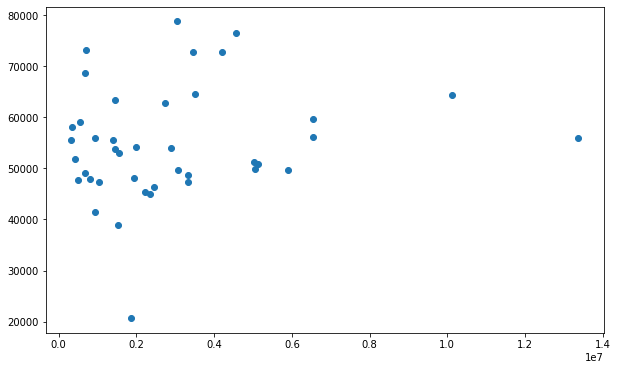

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(x = states['FemalePop'], y = states['Income'])

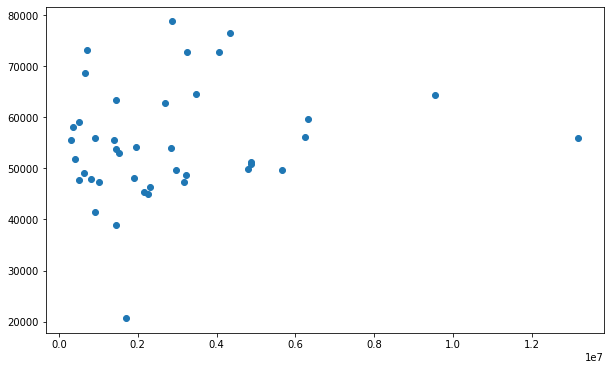

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(x = states['MalePop'], y = states['Income'])

(array([18.,  9.,  8.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.29090909,  6.17104233, 11.05117557, 15.9313088 , 20.81144204,
        25.69157528, 30.57170852, 35.45184175, 40.33197499, 45.21210823,
        50.09224147, 54.97237471, 59.85250794, 64.73264118, 69.61277442,
        74.49290766, 79.37304089, 84.25317413, 89.13330737, 94.01344061,
        98.89357384]),
 <a list of 20 Patch objects>)

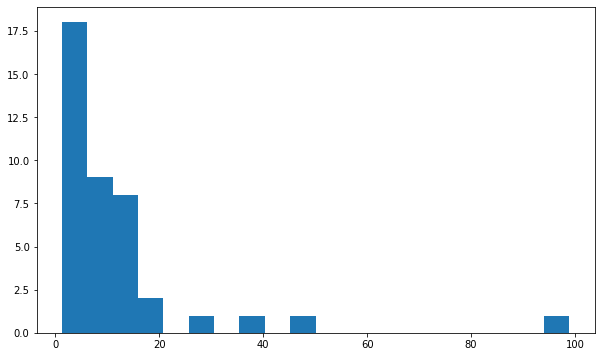

In [24]:
plt.figure(figsize=(10,6))
plt.hist(states['Hispanic'],bins=20)

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecatio

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D134F9FD0>,
      dtype=object)

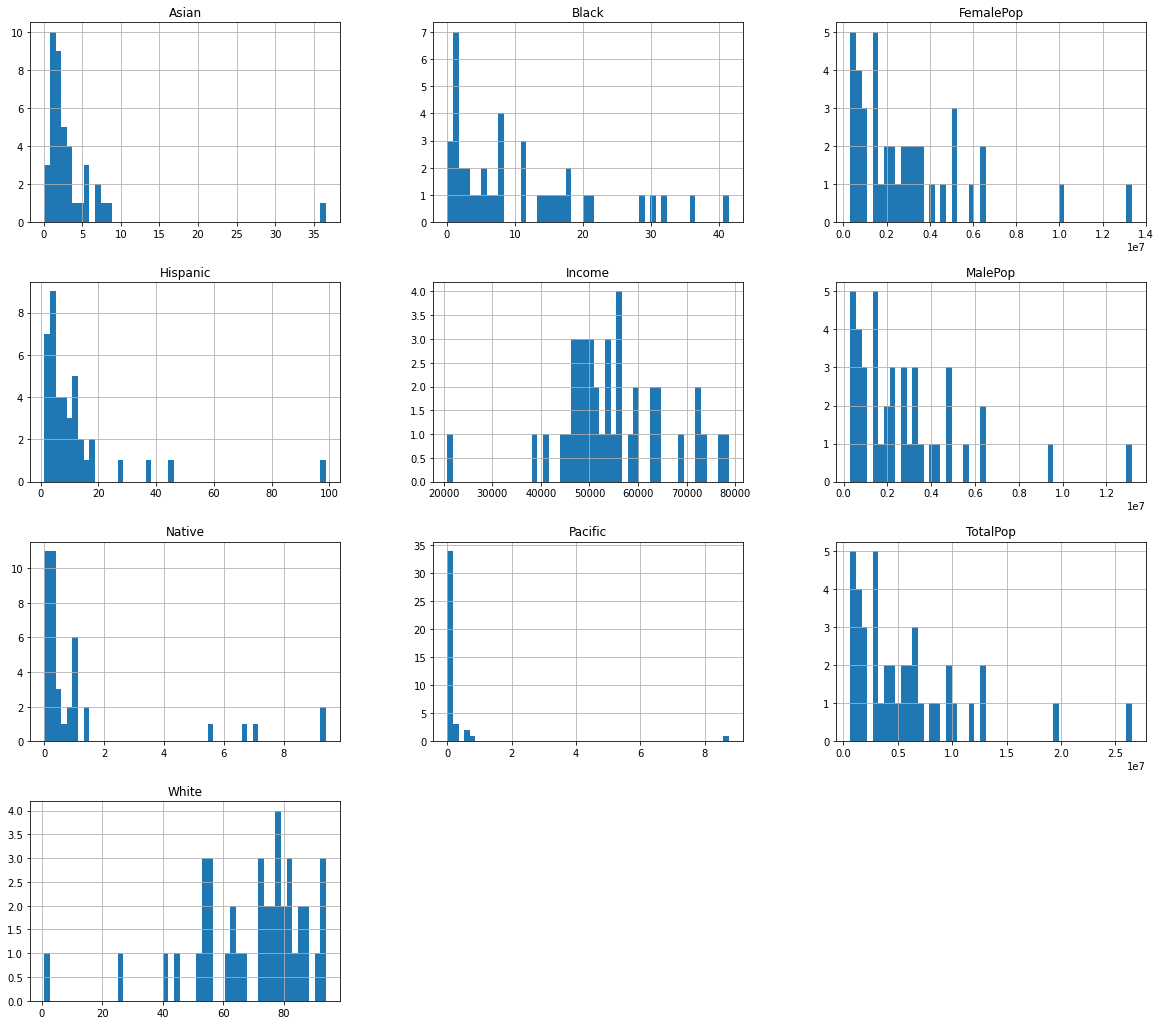

In [25]:
states.hist(bins=50,figsize=(20,18))

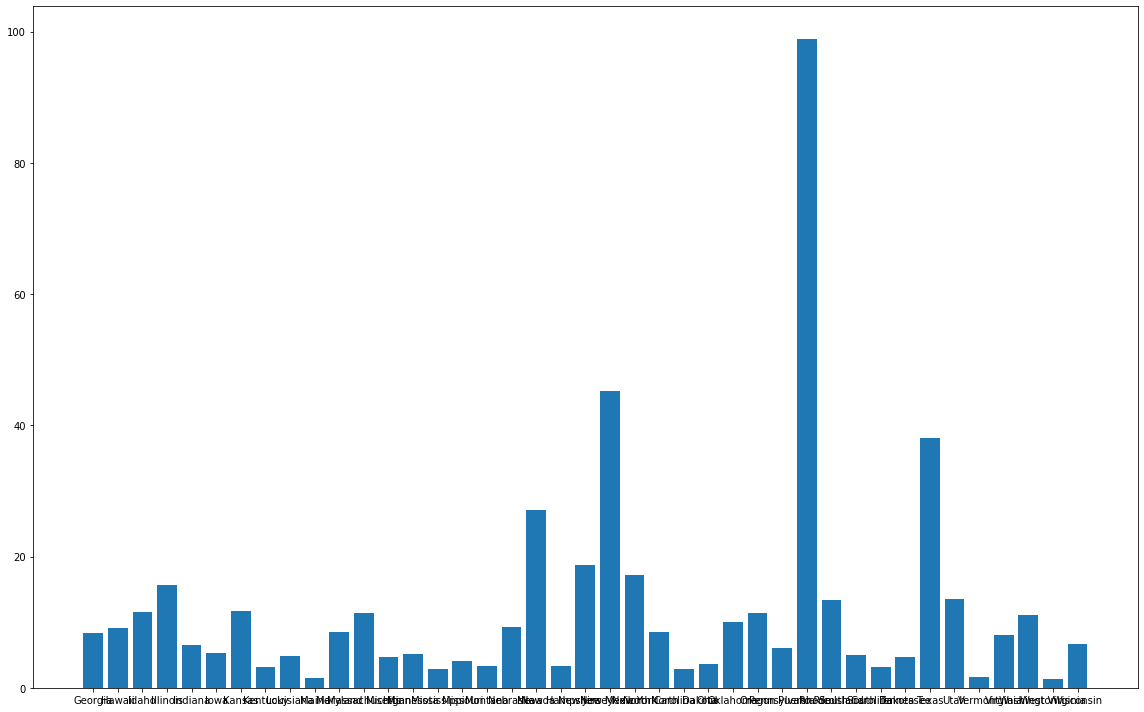

In [26]:
plt.figure(figsize=(16,10))
plt.bar(states['State'],states['Hispanic'])
plt.tight_layout()

## Petal Power Inventory Data

In [30]:
inventory = pd.read_csv('inventory.csv')

In [31]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
location               29 non-null object
product_type           29 non-null object
product_description    29 non-null object
quantity               29 non-null int64
price                  29 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.2+ KB


In [32]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [33]:
statenIsland = inventory[inventory['location'] == 'Staten Island']

In [35]:
product_request = statenIsland['product_type'].unique()

In [36]:
seed_request = inventory[(inventory['location'] == 'Brooklyn') & (inventory['product_type'] == 'seeds')]['product_description']
print(seed_request)

10         daisy
11    calla lily
12        tomato
Name: product_description, dtype: object


In [37]:
inventory['in_stock'] = inventory['quantity'].apply(lambda x: True if x>0 else False)

In [38]:
inventory.head()

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False


In [39]:
inventory['total_value'] = inventory['price'] * inventory['quantity']

In [40]:
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
